## The Ebola Epidemic

The **Western African Ebola virus epidemic** (2013–2016) was the most widespread outbreak of Ebola virus disease (EVD) in history, causing major loss of life and socioeconomic disruption in the region, mainly in Guinea, Liberia and Sierra Leone. The first cases were recorded in Guinea in December 2013; later, the disease spread to neighbouring Liberia and Sierra Leone, with minor outbreaks occurring elsewhere (https://en.wikipedia.org/wiki/Western_African_Ebola_virus_epidemic).

In [66]:
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
def get_node_colors(graph):
    color_map = []
    for node in graph:
        if 'G' in node:
            color_map.append('red')
        elif 'P' in node: 
            color_map.append('green')   
        elif 'H' in node:
            color_map.append('yellow')   
        elif 'F' in node:
            color_map.append('pink')
        elif 'B' in node:
            color_map.append('orange')
    return color_map

### Patient Zero
<img src='images/dead_body.jpg' style='float: left; width: 200px; padding: 20px;' /> Just as the World Health Organization (WHO) and local health organizations began to think that the epidemic was over, policeman in Monrovia (Liberia) found a body of a man in an abandonned warehouse.  The autopsy shed light on several important facts:
1. The man was stabbed 18 times
2. The man was a member of a local **g**ang
3. The man had been infected with Ebola

Let's call this man **PATIENT ZERO** (or **G0**, to save some typing).  We will use the prefix of **"G"** to denote **G**ang members (more on this later).


## Welcome to Graphs
In order for us to stem the spread of Ebola, we need to design a system that would allow us to identify everyone that **G0** had been in contact with (contact tracing) and to visualize these connections.

Welcome to **GRAPHS**!

What are graphs?

* Graphs are mathematical structures used to study pairwise relationships between objects. 
* It is a branch of Discrete Mathematics and has found multiple applications in Computer Science, Chemistry, Linguistics, Operations Research, Sociology etc.
* Graphs are used in data mining to model various structures and problems. 

Below is an example of how we can represent airline traffic as a graph.  Airports are represented by circles of various sizes.  In a graph, these circles are called "nodes". The flights themselves are lines that connect the nodes together.  These lines are called "edges".

<center><img src='images/airports-map-small.png' /></center>
http://www.martingrandjean.ch/connected-world-air-traffic-network/

A graph is essentially a pair of two collections of data, or sets.  One of these sets contains all the nodes (also known as vertices), and the second set contains all the edges.  

We can mathematically represent a graph **G** as **G = (V,E)**. 
* V is the set of vertices. 
* E is a set of edges. E is made up of pairs of elements from V (unordered pair)

In our previous example, V would represent all airports, and E would represent flights between pairs of airports.




## Let's get back to the Ebola problem

We will start our solution by creating an empty graph - a data structure that will store our nodes and edges, where nodes will represent people who were unfortunate enough to be in contact with **G0** and edges will represent how these people relate to each other (how or why did they come to be in contact with **G0** and with each other).  Hopefully, the resulting structure (graph) will help us trace the spread of Ebola.

In [68]:
# Creating an empty Graph 
G = nx.Graph() # Right now G is empty

### Now let's add our Patient Zero (**G0**) to the graph


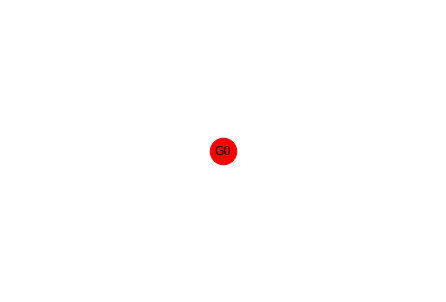

In [69]:
# Add a node
G.add_node('G0') 

# Let's also visualize our graph 
# (we'll do this after every step to make sure that we are tracing 
# contact among all possibly infected individuals)
nx.draw(G, with_labels=True, node_color=get_node_colors(G), node_size=700)

### Body discovery
The body was discovered by three police officers.  Let's add them to the graph and label them as P1, P2, and P3.

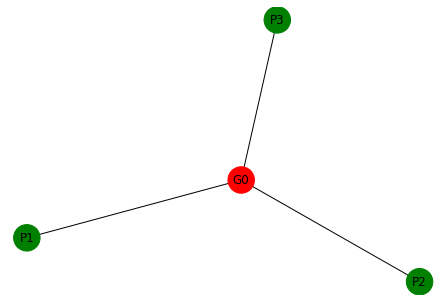

In [70]:
# Let's add police officers to our graph
# Note that this is an example of how to add multiple nodes from a list
G.add_nodes_from(['P1','P2','P3'])

# Now we nee to connect the police officers with G0 to show possible
# spread of infection
G.add_edge('G0','P1')
G.add_edge('G0','P2')
G.add_edge('G0','P3')

# Let's see what the graph looks like now
nx.draw(G, with_labels=True, node_color=get_node_colors(G), node_size=700)

### First healthcare responders
We also know from the police reports that two emergency medical technicians (EMT) had responded to the scene.  These EMTs performed the initial examination, prononced G0 dead, and removed the body from the scene.

We will add healthcare workers to the graph and label the nodes that represent healthcare workers with a prefix of **"H"**.

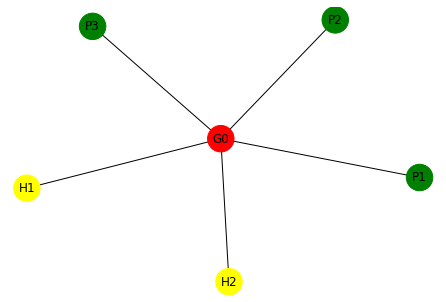

In [71]:
# Add EMTs to the graph
G.add_nodes_from(['H1','H2'])

# Create edges between G0 and the EMTs
G.add_edge('G0','H1')
G.add_edge('G0','H2')

# Let's see what the graph looks like now
nx.draw(G, with_labels=True, node_color=get_node_colors(G), node_size=700)

### More connections
At this point, we cannot assume that the possible infection came from G0.  Police officers and first responders interacted with each other at the crime scene, so they could have potentially spread the infection to each other, as well as to other people that they came in contact with. So at the very least, let's connect all responders who were at the scene


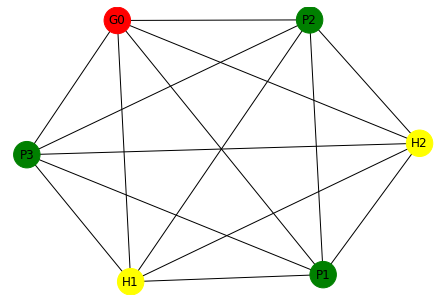

In [72]:
# Create edges between all responders at the scene 
# (police officers and EMTs)
G.add_edge('P1','P2')
G.add_edge('P1','P3')
G.add_edge('P1','H1')
G.add_edge('P1','H2')
G.add_edge('P2','P3')
G.add_edge('P2','H1')
G.add_edge('P2','H2')
G.add_edge('P3','H1')
G.add_edge('P3','H2')
G.add_edge('H1','H2')

# Let's see what the graph looks like now
nx.draw(G, with_labels=True, node_color=get_node_colors(G), node_size=700)

### A few more notes on our graph
* In the current version of the graph above, all nodes (vertices) are connected to each other by edges.  In other words, our graph's edge set contains every possible edge between **ALL** of the vertices. Such graph is called a **complete** graph.
* In our graph the edges do not have a direction.  In other words, at this point we do not care about the direction of infection spread.  For our purposes, it does not matter if P1 spread infection to P2, or P2 spread infection to P1.  This type of graph is called **undirected**.  Graphs where edges indicate the notion of direction are called **directed graphs**, or **digraphs**.  In such graphs, an edge (P1 --> P2) is differentiated from an edge (P2 <-- P1).


### Damn it, we have to think about other gang members
Through witness reports, the police have determined that the murder was committed by three other gang members, all of whom participated in the stubbing and thus were exposed to G0's blood.

We need to add them to the graph

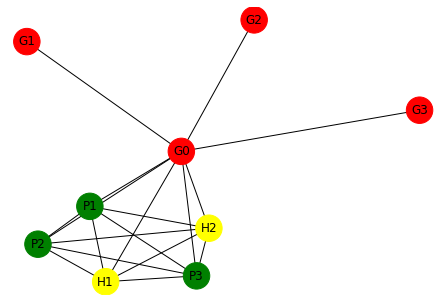

In [73]:
# Create nodes for the three gang members who stabbed G0
G.add_nodes_from(['G1','G2','G3'])

# Connect the three gang members to G0
G.add_edge('G0','G1')
G.add_edge('G0','G2')
G.add_edge('G0','G3')

# Let's see what the graph looks like now
nx.draw(G, with_labels=True, node_color=get_node_colors(G), node_size=700)

### Getting the body to the morgue
When G0's body was transported to the morgue, four more people came into contact with it - a coroner who performed the autopsy, the coroner's assistant, and two morgue workers who moved the body.  Additionally, the two workers who moved the body came in contact with EMT **H1** while signing the transfer paperwork.

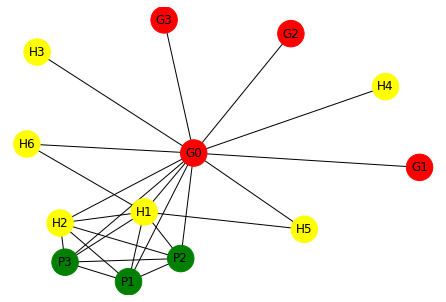

In [74]:
# Let's add four more healthcare workers into our graph
G.add_nodes_from(['H3','H4','H5','H6'])

# Let's connect these people to G0 
G.add_edge('G0','H3')
G.add_edge('G0','H4')
G.add_edge('G0','H5')
G.add_edge('G0','H6')

# Let's also connect the two morgue workers (H5 and H6) to H1
G.add_edge('H1','H5')
G.add_edge('H1','H6')

# Let's see what the graph looks like now
nx.draw(G, with_labels=True, node_color=get_node_colors(G), node_size=700)

### Family is important
Further police investigation showed that some of the police officers, healthcare workers, and even gang members had family members.  We'll prefix family member nodes with the letter **"F"**.

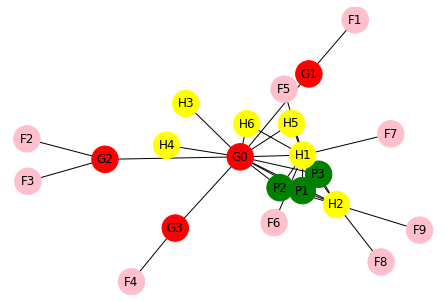

In [75]:
# Gang members' family members
G.add_nodes_from(['F1','F2','F3','F4'])
G.add_edge('G1','F1')
G.add_edge('G2','F2')
G.add_edge('G2','F3')
G.add_edge('G3','F4')

# Healthcare workers' family members
G.add_nodes_from(['F5','F6','F7','F8','F9'])
G.add_edge('H1','F5')
G.add_edge('H1','F6')
G.add_edge('H1','F7')
G.add_edge('H2','F8')
G.add_edge('H2','F9')

# Let's see what the graph looks like now
nx.draw(G, with_labels=True, node_color=get_node_colors(G), node_size=700)

### An sordid twist to the story
After interviewing family members and friends of some of the gang members, the police found that one of the gang members, G3, frequented a brothel... so now we have to track brothel workers with whom G3 might have had contact.  Let's label brothel workers nodes with **'B'**

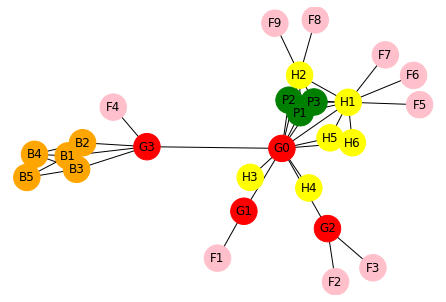

In [76]:
# Brothel workers (the brothel had four sex workers and one madame)
G.add_nodes_from(['B1','B2','B3','B4','B5'])

# G3 interacted with the following brothel workers
G.add_edge('G3','B1')
G.add_edge('G3','B2')
G.add_edge('G3','B3')

# These workers were in close proximity to each other and 
# to two other workers
G.add_edge('B1','B2')
G.add_edge('B1','B3')
G.add_edge('B1','B4')
G.add_edge('B1','B5')
G.add_edge('B2','B3')
G.add_edge('B2','B4')
G.add_edge('B3','B4')
G.add_edge('B3','B5')
G.add_edge('B3','B4')
G.add_edge('B3','B5')
G.add_edge('B4','B5')

# Let's see what the graph looks like now
nx.draw(G, with_labels=True, node_color=get_node_colors(G), node_size=700)

### This is the song that never ends...
As it turned out, some of the sex workers also had families, and other clients, and friends, and other people that they interacted with.  Police officers who were on the scene interacted with their coworkers.  The Ebola virus will keep spreading, and the graph will keep growing.  

So what can we do now to make what we have so far more useful?
* What kinds of questions can we ask of this data representation?
* What kinds of questions can we answer with this data representation?
* What kinds of questions we CANNOT answer with this data representations?
* What else can we do to make this more useful?